# AllLife Bank customer segmentation

OBJECTIVE:

* To identify different segments in the existing customer profiles based on their spending patterns as well as past interaction with the bank
* Perform EDA
* Apply Clustering Algorithms and mention how many clusters are formed
* How are these segments different from each other?
* What are your recommendations to the bank on how to better market to and service these customers?

## Data Dictionary:

* Sl_No: Serial Number 
* Customer Key: Customer unique key
* Avg_Credit_Limit: Average Credit Limit
* Total_Credit_Cards: Number of Credit Cards client has
* Total_visits_bank: Number of times client visited the bank
* Total_visits_online: Number of times client visited the website online
* Total_calls_made: Number of times client made a call

## Import necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Read the dataset:

In [2]:
bank_df=pd.read_csv('creditcard_customerdata - Sheet1.csv')
df = bank_df.copy() # Copying data frame to another variable to avoid any changes to original data
df.head()

,SI_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## Explore the data:

In [3]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 660 rows and 7 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SI_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SI_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [6]:
df.nunique()

SI_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False) #By using "false", the first values displayed contain the greatest number of missing values

SI_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
df.isnull().values.any() # Check for any NaN values 

False

## Observations:

* The data set is fairly small size. Something to be aware of as we strategize steps to take to segment the clients into groups. All of the data is in integer form.
* SI_No and Customer Key are repetitive based on above observations and information from the bank. These can be removed to prevent any unnecessary noise in the data.
* Average credit limit shows the minimum amount is 3,000 dollars and the maximum is 200,000 dollars. The average is around 34,600 dollars. There are 110 unique amounts in this column. This is a broad range and we will need to scale the data to ensure the observations are not skewed.
* Total credit card shows the minimum is 1.67 and the maximum is 10. The average is 4.7 credit cards. This column has 10 unique amounts.
* Total visits to the bank has a minimum of 0 and a maximum of 5. The average is 2 visits to the bank. This column has 6 unique amounts.
* Total visits online has a minimum of 0 and a maximum of 15. The average is 2.6 online visits. This column has 16 unique amounts.
* Total calls made to the bank has a minimum of 0 and a maximum of 10. The average is 3.6 calls. This column has 11 unique amounts.
* None of the columns have missing values or NaN values.
* Will change the column names to all lowercase letters for easier EDA.

## Remove "SI_No" and "Customer Key" columns and convert all column names to all lowercase characters:

In [9]:
df.pop('SI_No') # Remove SI_No column as it is repetitive and it's easier to use internal row numbers
df.pop('Customer Key') # Remove "Customer Key" as it is repetitive and unnecessary for our client insights
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [10]:
df= df.rename(columns=str.lower) # Convert column names to all lower case letters to make it more fluid to read the column names
df.head()

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


## Check for value counts for each column:

In [11]:
df['avg_credit_limit'].value_counts() # Checking value counts for various columns looking for out of context variables that may need correction.

8000     35
6000     31
13000    28
9000     28
10000    26
         ..
99000     1
98000     1
55000     1
97000     1
43000     1
Name: avg_credit_limit, Length: 110, dtype: int64

In [12]:
df['total_credit_cards'].value_counts() # Checking value counts for various columns looking for out of context variables that may need correction.

4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
8      11
9      11
Name: total_credit_cards, dtype: int64

In [13]:
df['total_visits_bank'].value_counts() # Checking value counts for various columns looking for out of context variables that may need correction.

2    158
1    112
0    100
3    100
5     98
4     92
Name: total_visits_bank, dtype: int64

In [14]:
df['total_visits_online'].value_counts() # Checking value counts for various columns looking for out of context variables that may need correction.

2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
8       6
10      6
12      6
11      5
13      5
9       4
6       1
14      1
Name: total_visits_online, dtype: int64

In [15]:
df['total_calls_made'].value_counts() # Checking value counts for various columns looking for out of context variables that may need correction.

4     108
0      97
2      91
1      90
3      83
6      39
7      35
9      32
8      30
5      29
10     26
Name: total_calls_made, dtype: int64

# EDA

## Univariate analysis:

In [16]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [17]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 12) 

### Observations on average credit limit:

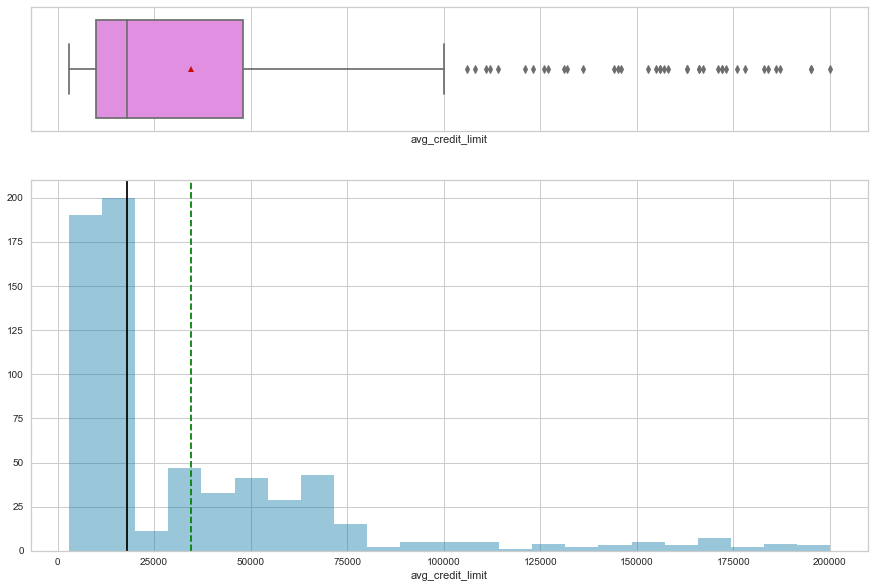

In [18]:
histogram_boxplot(df['avg_credit_limit'])

OBSERVATIONS:

* The average credit limit is widely dispersed. However, the data is skewed as the bulk of the data is from 75,000 dollars and below. Huge spike at the beginning of the spread which means must of the clients have an average credit limit under 20,000 dollars. 

### Observations on total credit cards:

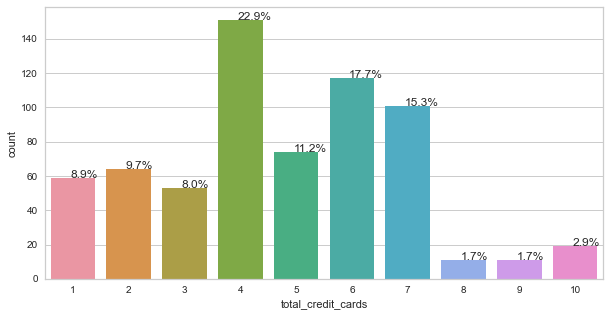

In [19]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['total_credit_cards'])
plt.xlabel('total_credit_cards')
plt.ylabel('count')
bar_perc(ax,df['total_credit_cards']) 

OBSERVATIONS:

* The bulk of the clients have 7 or fewer cards.
* The greatest majority of clients have 4 cards (23 percent).

### Observations on total visits to the bank:

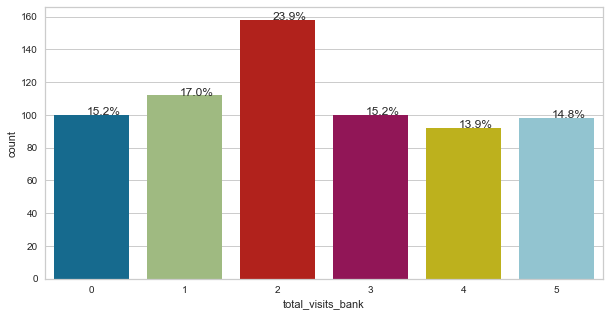

In [20]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['total_visits_bank'])
plt.xlabel('total_visits_bank')
plt.ylabel('count')
bar_perc(ax,df['total_visits_bank']) 

OBSERVATIONS:

* The majority of clients visited the bank 2 times (24 percent). 
* 15 percent never visted the banl at all. I'm curious if these same clients also did more online banking. Something to explore.

### Observations on total visits online:

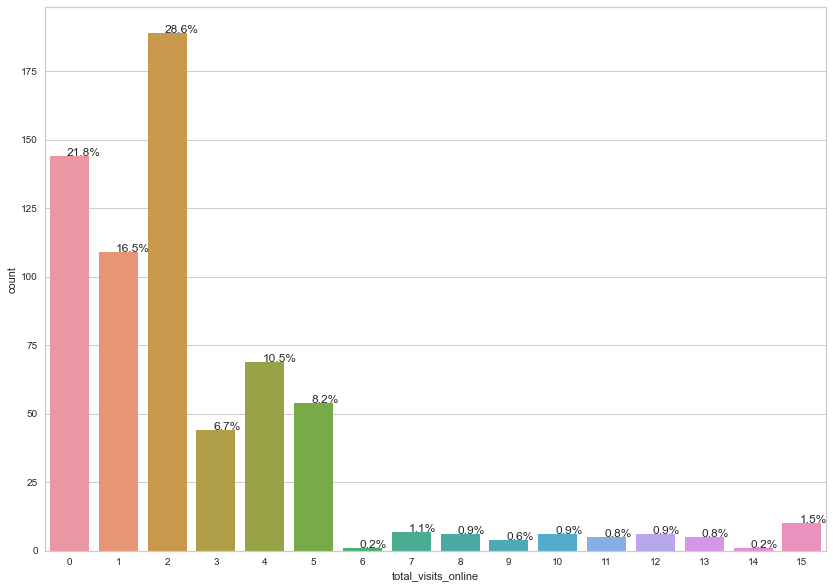

In [21]:
plt.figure(figsize=(14,10))
ax = sns.countplot(df['total_visits_online'])
plt.xlabel('total_visits_online')
plt.ylabel('count')
bar_perc(ax,df['total_visits_online']) 

OBSERVATIONS:

* 29 percent of the clients used the online platform twice.
* 22 percent of the clients did not use the online platform at all. 
* Majority of the clients fall within the 0 to 5 visits online range.

### Observations on total calls made:

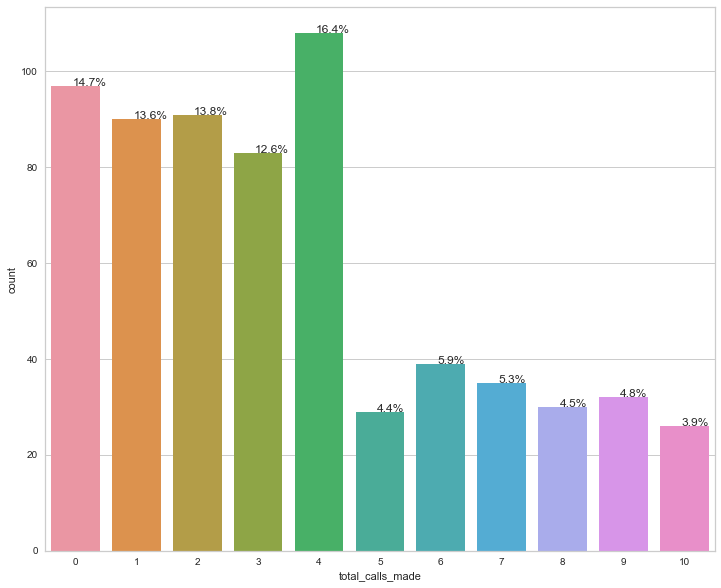

In [22]:
plt.figure(figsize=(12,10))
ax = sns.countplot(df['total_calls_made'])
plt.xlabel('total_calls_made')
plt.ylabel('count')
bar_perc(ax,df['total_calls_made']) 

OBSERVATIONS:

* 16 percent of the clients made 4 calls.
* Majority of clients made between 0 to 4 calls. 

## Bivariate analysis:

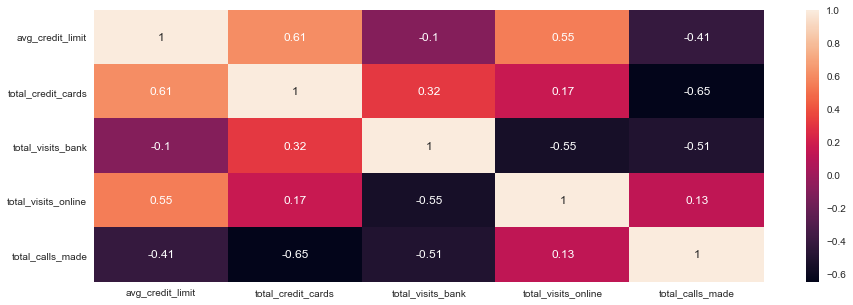

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Correlation using heatmap:

OBSERVATIONS:

* Average credit limit and total credit cards has a correlation of .61 which is explainable in that the more credit cards a client has, the greater his credit limit increases. 
* Average credit limit increases as the total visits to online increases with a .55 correlation. Possibly online interactions are positive hence explaining the increase in credit limit. Or this could be due to customers applying online to increase their limits?
* There are some columns that show a higher than average negative correlation. As visits to online increases, the physical visits to the bank decrease. As more calls are made, the visits decrease.
* Otherwise, the correlation heatmap does not provide any profound insights. 

## Average credit limit analysis:

### Observations with average credit limit & total credit cards:

<AxesSubplot:xlabel='total_credit_cards', ylabel='avg_credit_limit'>

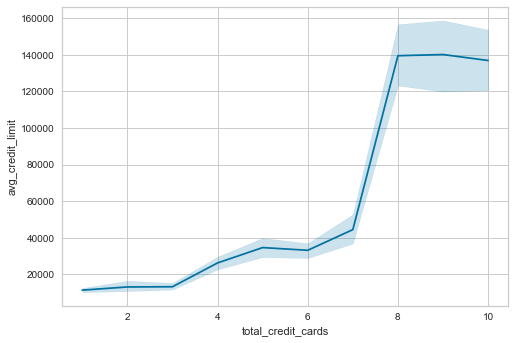

In [24]:
sns.lineplot(data=df, x="total_credit_cards", y="avg_credit_limit")

OBSERVATIONS:

* The average credit limit slightly increases up until the client has 7 or more credit cards. At that point, there is a sharp increase in the average credit limit.  

### Observations with average credit limit & total visits to the bank:

<AxesSubplot:xlabel='total_visits_bank', ylabel='avg_credit_limit'>

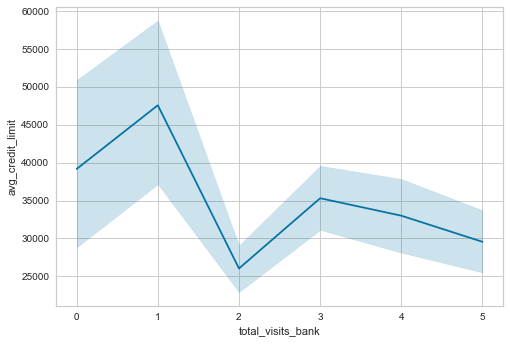

In [25]:
sns.lineplot(data=df, x="total_visits_bank", y="avg_credit_limit")

OBSERVATIONS:

* Those that visited the bank only once, had the highest average credit limit. Those that visited the bank only 2 times, had the lowest credit limit. 
* There was a small spike around 3 visits and then the average credit limit drops off slowly.

### Observations with average credit limit & total visits online:

<AxesSubplot:xlabel='total_visits_online', ylabel='avg_credit_limit'>

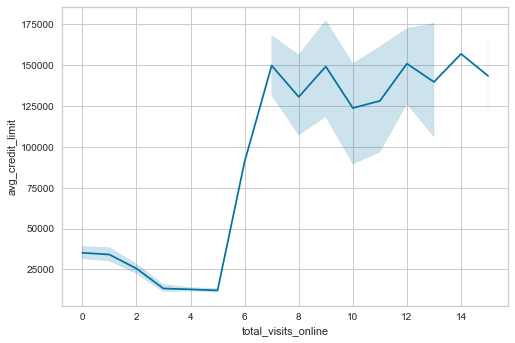

In [26]:
sns.lineplot(data=df, x="total_visits_online", y="avg_credit_limit")

OBSERVATIONS:

* Those with fairly low credit limits (under 35,000 dollar) have the lowest interaction with the bank online.
* Starting at 5 online visits, there is a huge spike in the credit limit (around 150,000 dollars). 
* From 7 visits on, the credit limit is varying but stays within the range of 100,000 to 175,000 dollars. 

### Observations with average credit limit & total calls made:

<AxesSubplot:xlabel='total_calls_made', ylabel='avg_credit_limit'>

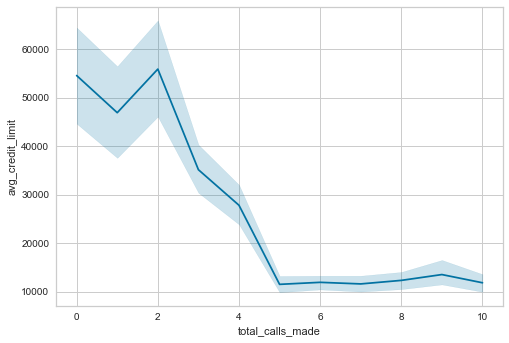

In [27]:
sns.lineplot(data=df, x="total_calls_made", y="avg_credit_limit")

OBSERVATIONS:

* The highest peak occurs where there are 2 total calls made and the credit limit is in the range from 45,000 to 65,000 dollars. After that there is a sharp decline in the average credit limit as you increase the number of calls the clients make. 
* From about the 5 call mark up to 10 calls, the credit limit stays fairly steady a little above 10,000 dollars.

## Total credit cards analysis:

### Observations with total credit cards & total visits to the bank:

<AxesSubplot:xlabel='total_credit_cards', ylabel='total_visits_bank'>

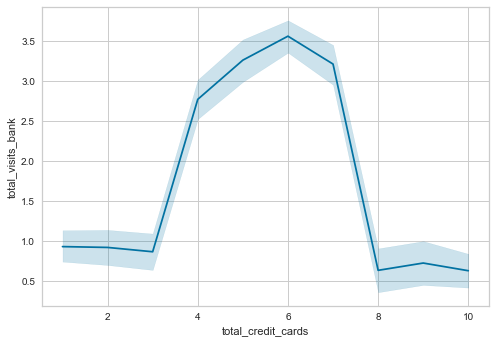

In [28]:
sns.lineplot(data=df, x="total_credit_cards", y="total_visits_bank")

OBSERVATIONS:

* There is a sharp increase in the number of visits to the bank when a client has between 3 and 8 cards. It peaks at 3.5 visits with 6 cards. 

### Observations with total credit cards & total visit online:

<AxesSubplot:xlabel='total_credit_cards', ylabel='total_visits_online'>

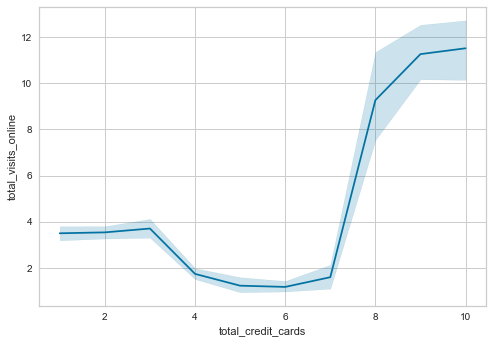

In [29]:
sns.lineplot(data=df, x="total_credit_cards", y="total_visits_online")

OBSERVATIONS:

* When a client has 2 to 3 cards, they visit online around 3 times.
* When a client has 3 to 7 cards, that number drops to 1.
* At the 7 credit card mark, there is a sharp incline to 9 visits.
* A client with 8 cards visits online about 9 times and a client with 10 cards visits online about 11 times. 

### Observations with total credit cards & total_calls_made: 

<AxesSubplot:xlabel='total_credit_cards', ylabel='total_calls_made'>

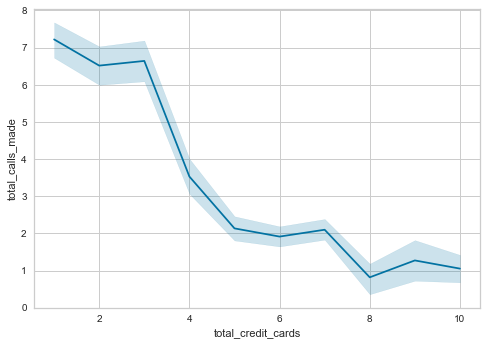

In [30]:
sns.lineplot(data=df, x="total_credit_cards", y="total_calls_made")

OBSERVATIONS:

* Total calls made peak at 7 and with clients that have 1 card. 
* From 3 cards and up, the number of calls dramatically declines at first and then slower continues to decrease.
* As the number of cards increase essentially, the total calls made decreases. 

## Total visits to the bank analysis:

### Observations with total visits to the bank & total visits online:

<AxesSubplot:xlabel='total_visits_bank', ylabel='total_visits_online'>

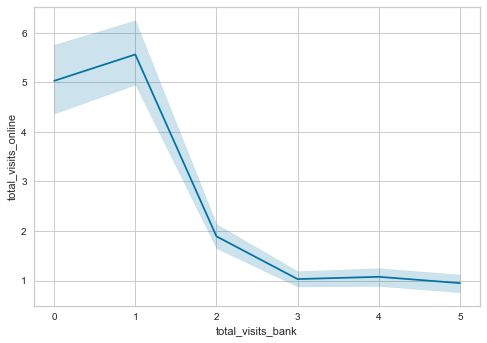

In [31]:
sns.lineplot(data=df, x="total_visits_bank", y="total_visits_online")

OBSERVATIONS:

* The highest peak occurs when a client has visited the bank one time: The total visits online is at 4.5 to 6 visits. * After that there is a steep decline when a client has 2 visits to the bank, the online visits drops to 2.
* 3 or more visits to the bank shows an almost steady number of online visits: 1 visit. 

### Observations with total visits to the bank & total calls made:

<AxesSubplot:xlabel='total_visits_bank', ylabel='total_calls_made'>

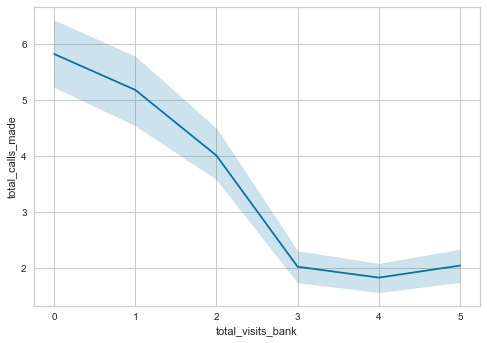

In [32]:
sns.lineplot(data=df, x="total_visits_bank", y="total_calls_made")

OBSEERVATIONS:

* At zero visits to the bank, there are close to 6 calls made to the bank. This begins to decline as the total number of visits to the bank increases.
* From 3 visits to the bank and beyond, the total calls made stays fairly steady at 2 calls to the bank.

## Total visits online analysis:

### Observations with total visits online & total calls made:

<AxesSubplot:xlabel='total_visits_online', ylabel='total_calls_made'>

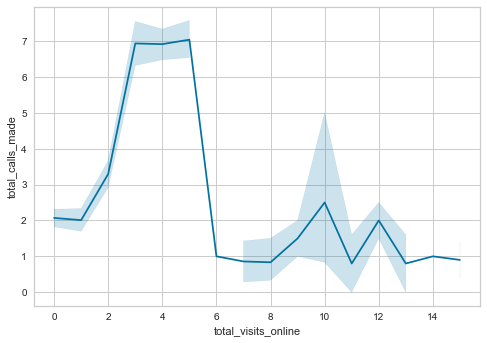

In [33]:
sns.lineplot(data=df, x="total_visits_online", y="total_calls_made")

OBSERVATIONS:

* The total number of online visits peaks between 3 and 5 visits during which there are 7 total calls made to the bank. 
* At 6 online visits the total calls made drops to 1. Then the range from 8 to 14 online visits has a varying number of calls made from 0 to 5.
* It seems on average, the more a person visits online, the less likely they are to call the bank. 

## Total calls made analysis:

### These observations can all be found above in the previous bivariate analysis.

## Additional observations:

* I want to look at the comparison between the clients with 4, 6 and 7 cards and their credit limit. These cardholders represent more than half of the clients in the data set. I thought it would be insightful to see how the majority compares when comparing limits to number of credit cards.

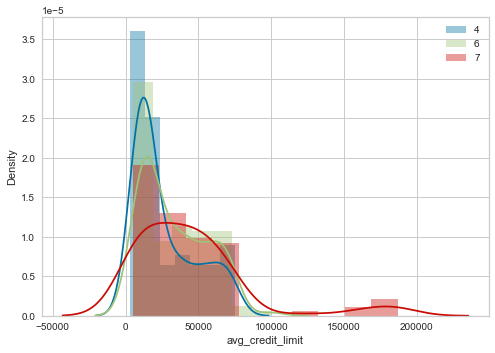

In [34]:
sns.distplot(df[df['total_credit_cards']==4]['avg_credit_limit'],color='b',label=4)
sns.distplot(df[df['total_credit_cards']==6]['avg_credit_limit'],color='g',label=6)
sns.distplot(df[df['total_credit_cards']==7]['avg_credit_limit'],color='r',label=7)
plt.legend()
plt.show()

OBSERVATIONS:

* These cards represent the largest portion of the client pool. The bulk of their credit limit falls between 3,000 and 75,000 dollars irrespecive of if the client has 4, 6 or 7 cards. There are a few outliers for clients with 7 cards between 150,000 and 175,000 range. 

### Insights into the clients' interaction preferance with the bank:

In [35]:
client_interaction_insight=df.filter(['total_visits_bank', 'total_visits_online', 'total_calls_made'])
client_interaction_insight.head()

,total_visits_bank,total_visits_online,total_calls_made
0,1,1,0
1,0,10,9
2,1,3,4
3,1,1,4
4,0,12,3


In [36]:
# Review information based on the client's visit to the bank vs. total visits online and total calls made
client_interaction_insight.groupby(client_interaction_insight.total_visits_bank).mean()

,total_visits_online,total_calls_made
total_visits_bank,,
0,5.030000,5.820000
1,5.562500,5.178571
2,1.892405,4.006329
3,1.030000,2.020000
4,1.076087,1.826087
5,0.948980,2.040816


OBSERVATIONS:

* Overall, the fewer times the client visits the bank, the more they rely on either online or calling the bank as a means to interact with the bank. 
* For those who never visit the bank in person, they visit the online portal 5 times and call close to 6 times.
* For those who visit the bank twice, they prefer to call at a rate of 2 to 1 to visiting the bank.
* For those who visit the bank 3 or more times, the same ratio applies: almost 2 to 1 they prefer to call vs. visiting online. 

CONCLUSIONS:

* Based on this information, it would seem that overall, clients prefer to call the bank with a 2 to 1 ratio over going online. The exception to that is those that visited the bank once preferred online platform slightly more than calling. 
* It seems clients either way prefer a "real person" either by visiting the bank or talking to them on the phone. This could also suggest that the online platform is not equipped to handle the client's issues or needs and this is an area the bank could work on in order to improve a higher turnaroud time for client's inquiries.

### Insights with client who have 4, 6 and 7 cards and their preference for interacting with the bank:

In [37]:
# Create a seperate df specific to what I want to groupby
card_holder_interaction=df.filter(['total_credit_cards','total_visits_bank', 'total_visits_online', 'total_calls_made'])
card_holder_interaction.head()

,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
0,2,1,1,0
1,3,0,10,9
2,7,1,3,4
3,5,1,1,4
4,6,0,12,3


In [38]:
# Look at the means for the different client interactions for the card members who have 4, 6 and 7 cards.
card_holder_interaction.groupby(card_holder_interaction.total_credit_cards).mean()

,total_visits_bank,total_visits_online,total_calls_made
total_credit_cards,,,
1,0.932203,3.491525,7.220339
2,0.921875,3.531250,6.515625
3,0.867925,3.698113,6.641509
4,2.768212,1.728477,3.529801
5,3.256757,1.216216,2.135135
6,3.555556,1.162393,1.914530
7,3.207921,1.584158,2.099010
8,0.636364,9.272727,0.818182
9,0.727273,11.272727,1.272727


OBSERVATIONS:

* For those with 4 credit cards: On average, they visited the bank 3 times, visited online 2 times and made 3.5 calls.
* For those with 6 credit cards: On average, they visited the bank 4 times, visited online 1 time and made 2 calls.
* For those with 7 credit cards: On average, they visited the bank 3 times, visited online 2 times and made 2 calls.

## Data Pre-processing

### Outlier detection:

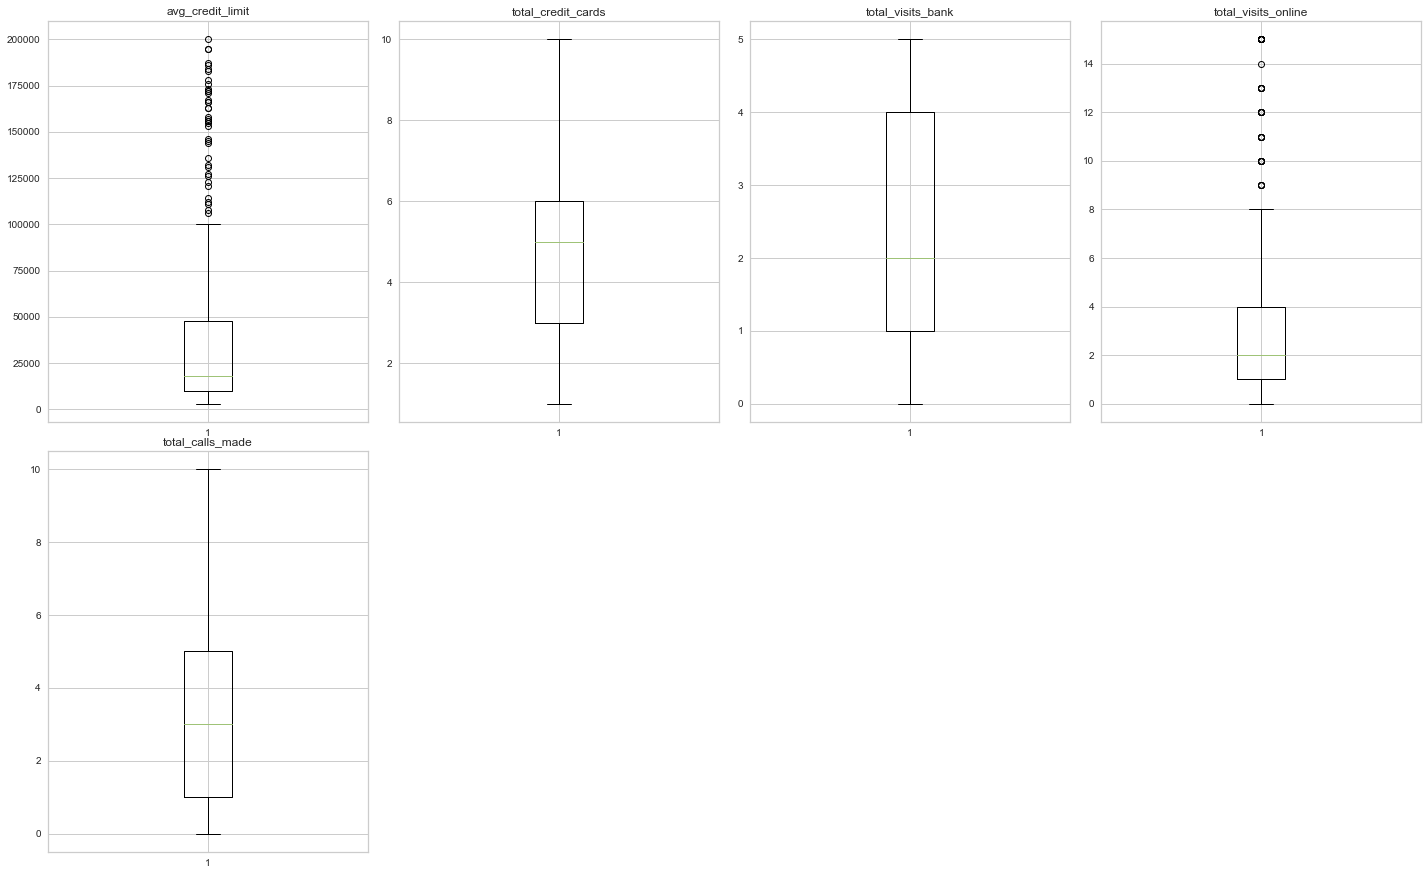

In [39]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

OBSERVATIONS:

* There are outliers present in both the average credit limit and total visits online columns. In my opinion, I believe the outliers are important to the insights we are trying to gleen. Therefore, I am choosing to leave them in. In the event it presents a problem later, we can reevaluate at that time.

### Standard scaling:

In [50]:
# Variables used for clustering
all_col = df.select_dtypes(include=np.number).columns.tolist()

In [51]:
# Scaling the data set before clustering
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled=scaler.fit_transform(subset)   

In [52]:
#Creating a dataframe from the scaled data above
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

## Applying K-means clustering:

Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9429779127933392
Number of Clusters: 7 	Average Distortion: 0.9233911148645891
Number of Clusters: 8 	Average Distortion: 0.889281633308646


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

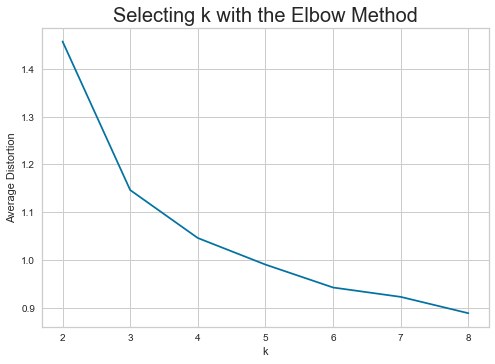

In [53]:
clusters=range(2,9) # Determines our minimum and maximum number of clusters to attempt
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

OBSERVATIONS:

* Acording to the elbow method, the best value of k occurs when we use 3 clusters.

### Silhouette Score:

In [54]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.2717470361089752)
For n_clusters = 6, silhouette score is 0.2558909247699063)
For n_clusters = 7, silhouette score is 0.248175083050816)
For n_clusters = 8, silhouette score is 0.22673228192114367)
For n_clusters = 9, silhouette score is 0.2264874185869881)


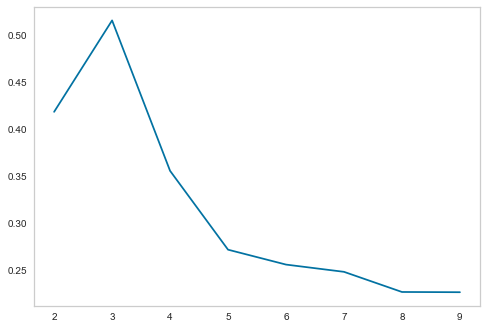

In [55]:
plt.plot(cluster_list,sil_score)
plt.grid()

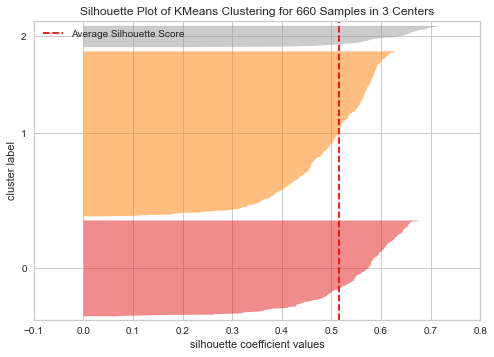

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

OBSERVATIONS:

* The Silhouette score at the 3 cluster mark is .51. The closer we are to 1.0, the "goodness" of clustering is considered at it's best.

## Cluster profiling:

In [57]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=1)

In [59]:
df['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [60]:
cluster_profile = df.groupby('K_means_segments').mean()

In [61]:
cluster_profile['count_in_each_segment'] = df.groupby('K_means_segments')['total_credit_cards'].count().values

In [62]:
# Display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


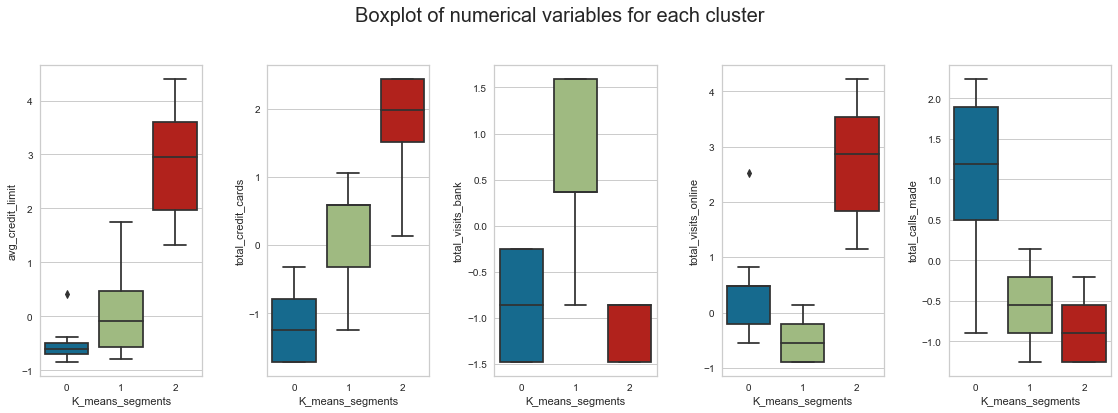

In [63]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

OBSERVATIONS:

* Cluster 0: These clients have the lowest credit limit range with the average around 12,000 dollars, the lowest number of credit cards averaging 2, utilized in store banking on average once, visited online slightly over 3 times and made the most calls to the bank than any other segment with close to 7 calls. This segment comprises 224 clients of the 660 clients.  

* Cluster 1: These clients have moderate credit limits with an average of 34,000 dollars, around 5.5 credit cards, they visited the banks in person more than any other segment with 3.5 visits, they had the lowest occurrence of visiting online with 1 visit, they made 2 calls to the bank and comprise the largest segment of clients with a total of 386.  

* Cluster 2: These clients have the highest average credit limit with 141,000 dollars, they have the highest number of credit cards with an average of 9, they had the lowest number of visits to the bank with maybe 1 visit, they had the highest visits to the online platform with 11 visits, they had the lowest number of calls made with 1 call and they comprise the smallest segment of the clients with only 50. 

## Applying Hierarchical clustering:

In [66]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 

In [82]:
# Cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# The closer it is to 1, the better the clustering
# Determine the best distance and linkage options for the optimal cophenetic score
distance_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
        print('Cophent correlation for distance metrics {} and linkage method {} is {}'.format(dm,lm,c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
            

Cophent correlation for distance metrics euclidean and linkage method single is 0.8570957708532765
Cophent correlation for distance metrics euclidean and linkage method complete is 0.9200216505568093
Cophent correlation for distance metrics euclidean and linkage method average is 0.9326509851302
Cophent correlation for distance metrics euclidean and linkage method weighted is 0.9161162029575868
Cophent correlation for distance metrics chebyshev and linkage method single is 0.7303102980726248
Cophent correlation for distance metrics chebyshev and linkage method complete is 0.8605582722891504
Cophent correlation for distance metrics chebyshev and linkage method average is 0.9237370020598301
Cophent correlation for distance metrics chebyshev and linkage method weighted is 0.9176649995194868
Cophent correlation for distance metrics mahalanobis and linkage method single is 0.9059233776187976
Cophent correlation for distance metrics mahalanobis and linkage method complete is 0.72992461562285

In [68]:
print('Highest cophenetic correlation is {}, which is obtained with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Highest cophenetic correlation is 0.9102691112621796, which is obtained with euclidean distance metric and average linkage method


OBSERVATIONS:

* Based on the cophentic correlation score, the optimal results come from using the Euclidean distance and the average linkage method.

### Compare centroid, median, and ward linkage methods using Euclidean distance metrics:

In [81]:
linkage_methods = ['single', 'complete', 'average','median','ward', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
    print('Cophent correlation for distance metrics {} and linkage method {} is {}'.format('euclidean',lm,c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = dm
        high_dm_lm[1] = lm
print('*'*110)
print('Highest cophenet correlation is {}, which is obtained with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Cophent correlation for distance metrics euclidean and linkage method single is 0.8570957708532765
Cophent correlation for distance metrics euclidean and linkage method complete is 0.9200216505568093
Cophent correlation for distance metrics euclidean and linkage method average is 0.9326509851302
Cophent correlation for distance metrics euclidean and linkage method median is 0.9203623818313699
Cophent correlation for distance metrics euclidean and linkage method ward is 0.8237257149884929
Cophent correlation for distance metrics euclidean and linkage method weighted is 0.9161162029575868
**************************************************************************************************************
Highest cophenet correlation is 0.9326509851302, which is obtained with cityblock distance metric and average linkage method


OBSERVATIONS:

* The highest cophenetic correlation is obtained using cityblock distance matrix and average linkage method.

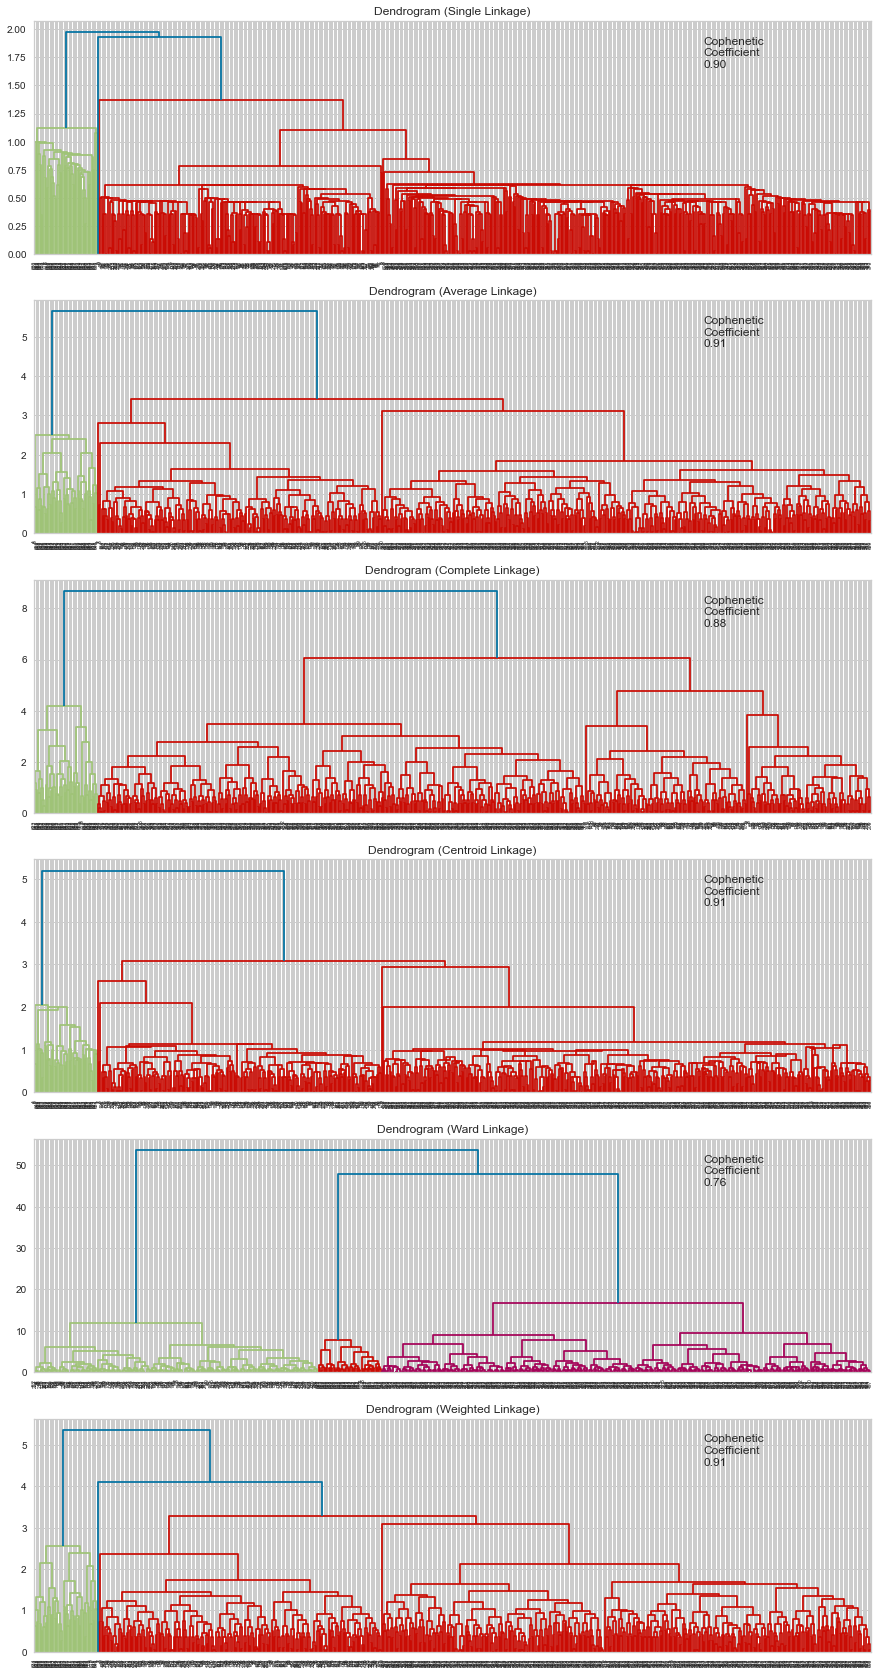

In [71]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
    compare.append([method, coph_corr])

OBSERVATIONS:

* The dendrogram with the best linkage is the Average linkage.

In [72]:
# Create and print dataframe to compare Cophenetic Coefficient for each linkage
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.898179
1,average,0.910269
2,complete,0.884421
3,centroid,0.906845
4,ward,0.756625
5,weighted,0.907000


OBSERVATIONS:

* The Cophenetic coefficient for the Average linkage at .91 also reflects the results of the dendrogram comparison.
* Let's check Cityblock as it also had a significant Cophenetic correlation.

In [73]:
distance_metrics = [ 'cityblock']
linkage_methods = ['average', 'weighted']

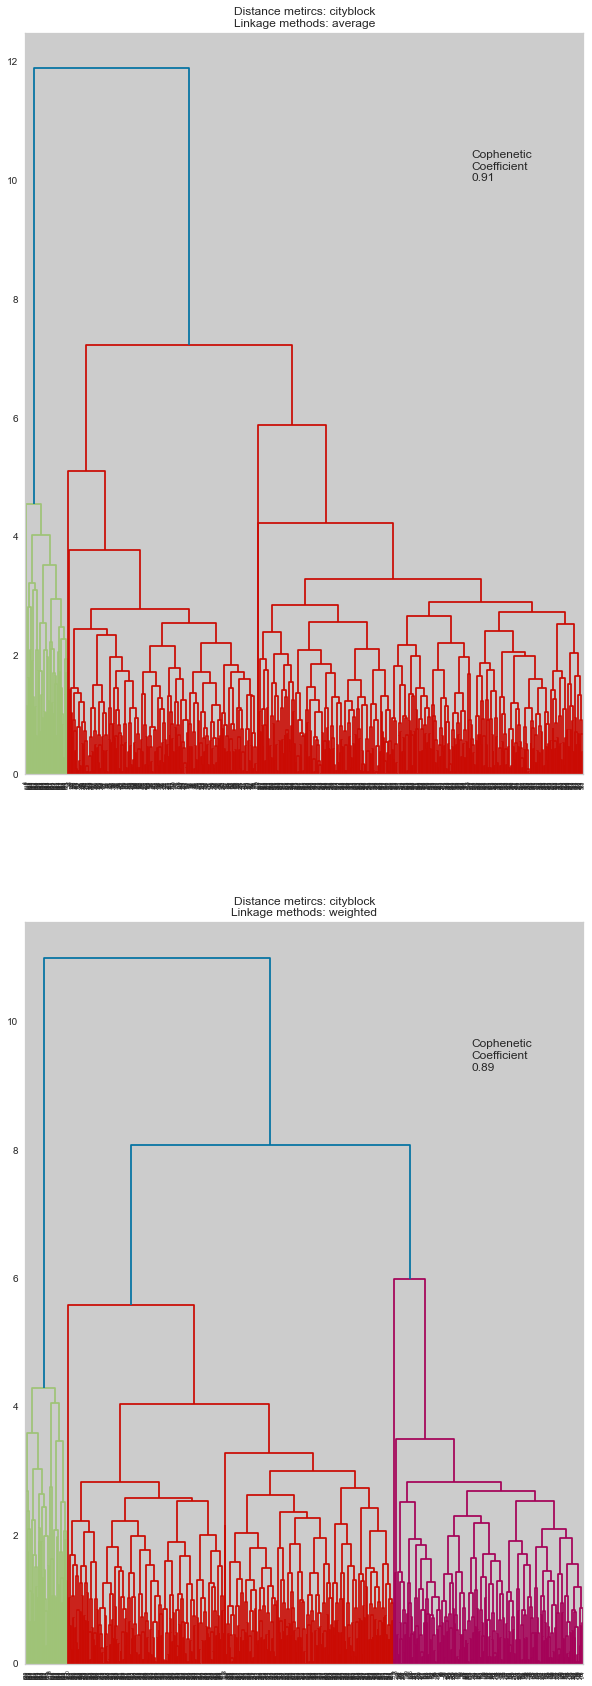

In [74]:
# Create a subplot image
fig, axs = plt.subplots(len(distance_metrics)+len(distance_metrics), 1, figsize=(10, 30))
i=0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        dendrogram(Z,  ax=axs[i]);
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))
        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                        (0.80, 0.80),
                        xycoords='axes fraction')
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))                        
        i +=1
       

OBSERVATIONS:

* Overall, the Average linkage method provides us with clear clusters and the Cophenetic correlation of .91 was the highest. 
* 3 clusters would be the appropriate number of clusters based on the Average linkage method dendrogram.

### Create Agglomerative Clustering using 3 clusters:

In [75]:
#Trying with K value as 3
HCmodel = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='average')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [76]:
df['HC_Clusters'] = HCmodel.labels_

In [77]:
cluster_profile = df.groupby('HC_Clusters').mean()

In [78]:
cluster_profile['count_in_each_segments'] = df.groupby('HC_Clusters')['total_credit_cards'].count().values

In [79]:
# Display cluster profiles
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,1,386
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2,50
2,12174.107143,2.410714,0.933036,3.553571,6.870536,0,224


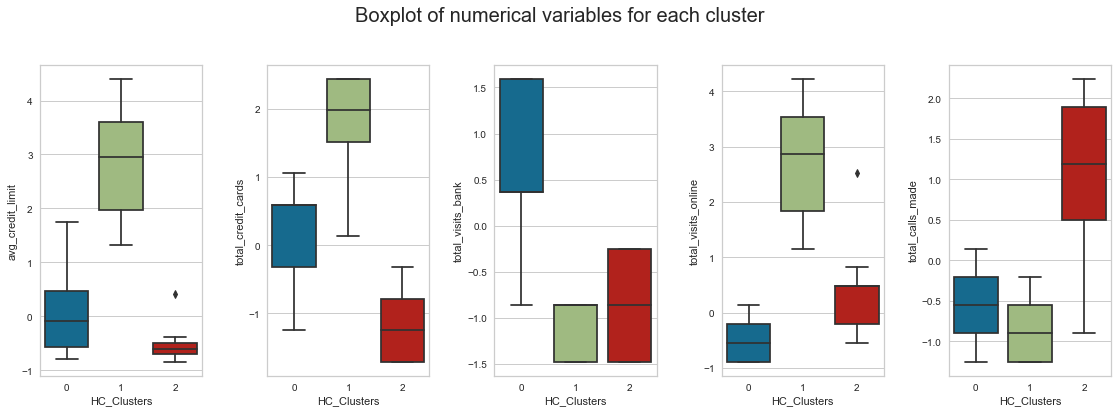

In [80]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

OBSERVATIONS:

* Cluster 0: These clients have an average credit limit of 34,000 dollars, on average they have 6 credit cards, the highest number of visits to the bank in person with a little over 3 visits on average, on average only 1 visit online which is the lowest of the segments, and 2 calls on average. This group comprised the largest segment of the total group with 386 clients.

* Cluster 1: These clients have the highest credit limit of 141,000 dollars, they have the highest number of total credit cards with 9 on average, they went to the bank the least of any other group with not quite 1 visit, they had the highest number of visits online with 11 visits on average, and called the bank the least with 1 call on average. This group comprised the smallest proportion of the total client pool with 50 clients.

* Cluster 2: These clients have an average credit limit of 12,000 dollars, they have 2 credit cards on average, they visit the bank once, they visit the bank online on average 4 times, they make the most calls to the bank than other other segment with 7 calls, and they comprise 224 clients of the 660 total. 

## Comparing K-means and Hierarchical clustering  techniques & segment profiles:

* When comparing K-means and Hierarchical clustering techniques results, it's important to remember the differences in how these 2 methodologies address the data itself. With K-means, the user is required to establish the best value for K. In this case, we used the commonly used elbow method and determined that 3 was the best value of K. In Hierarchical clustering, you choose between divisive and agglomerative techniques. In this instance, we used agglomerative. This essentially means we start with many clusters and eventually we end up with one cluster. Once you view the dendrogram, you can evaluate the best number of clusters. In this instance, we decided to use 3 clusters. K-means typically does not work well with highly skewed data but works well with large data sets. The reverse is true for Hierarchical clustering. In the end, both clustering methods resulted in 3 cluster profiles. 

* The current data set we are working with does have skewed data. Although the decision was made to not perform outlier treatment, it does not openly appear to have made a negative impact on the results. This may be based on the data size being smaller. The number of clusters we used for both methods of clustering was the same: 3. Although the number associated with the different segments for each clustering technique was different, the clusters themselves were the same with regard to mean values. 

* Cluster 0 in K-means is Cluster 2 for Hierarchical clustering.
* Cluster 1 in K-means is Cluster 0 for Hierarchical clustering. 
* Cluster 2 in K-means is Cluster 1 for Hierarchical clustering. 

* Despite the differences in their methodologies, the overall results are quite similar. 

* The largest cluster group (386 clients of 660) have an average credit limit of 34,000 dollars, 6 credit cards, the highest number of visits to the bank in person with a little over 3 visits, lowest occurrence of visiting the online portal with 1 visit, and averaged 2 calls to the bank.
* The middle cluster group (224 clients out of 660) have an average credit limit of 12,000, 2 credit cards, they visit the bank once, visit online 4 times, and they make the most calls to the bank with 7 calls.
* The smallest cluster group (50 of the 660) has the highest credit limit with 141,000 dollars, highest number of credit cards with 9 on average, they went to the bank in person the least with maybe 1 visit, they had the highest number of online visits with 11 visits and called the bank once on average. 

## Insights and recommendations:

CLIENT INTERACTIONS WITH THE BANK INSIGHT:
* When evaluating a client's interactions with the bank, the data shows that clients prefer to call or go into the bank at a rate of 2 to 1 over going online. This could be interpreted as clients prefer a "real person" either by visiting the bank or talking to them on the phone. This could also suggest that the online platform is not equipped to handle the client's issues or needs and this is an area the bank could work on in order to improve a higher turnaround time for client's inquiries.

CLIENT SPENDING HABITS INSIGHT:
* With regard to client spending habits, there is not much one can glean from just the number of cards and their credit limits. The data shows that the higher the limits the client has, the more cards they have. Greater insights based on average monthly spending and credit utilization might be a productive way of learning more about the clients the bank is serving.

RECOMMENDATIONS:
* The largest client segment (386 clients of 660) has a credit limit of 34,000 dollars, 6 credit cards, utilizes in person banking the most and online portal the least. Marketing should emphasize the personalized attention that clients get from in person interactions and personal service. A "We are here for you and your needs" type of strategy could be effective in drawing this client in. Since this is the largest portion of the group and they are more moderate in their overall spending limit, this is a good group to evaluate their credit penetration and increase offerings based on the findings.
* The middle client segment (224 clients of 660) has the lowest credit limit at 12,000 dollars, fewer credit cards, prefer online banking over in person but make the most calls of any other segment. This group could have some serious untapped potential. This is another group that could benefit from further analysis of their income and credit utilization. Increasing the credit penetration of this segment could occur if the marketing team uses a strategy of individual phone calls. They prefer the verbal interaction and it would be an opportunity to learn more about their needs and explain the bank's offerings that align with their needs.
* The smallest client segment (50 of the 660) has the highest credit limit at 141,000 dollars, highest number of cards and prefers online banking services. Marketing should emphasize the ease of using the online platform, how it's available when they need to use it, etc. A "Here when you need us" type of strategy could be effective. Online advertising could be the best opportunity to expand the number of clients who fall within this group. 

FURTHER ANALYSIS:
* A deeper understanding of these clients' profiles would be beneficial to the bank in regards to product offerings, communication preferences of each group, and marketing strategy (TV, radio, online) preferences. Information concerning occupation, income, how they pay their bills (online, in person, mail) could provide some insights that could allow the bank to ensure the bank is: addressing all inquiries, their offerings reflect the clients they serve, the clients are communicated with in a way that aligns with their lifestyle and they are targeting each segment in such a way that reflects their spending and communication preferences. In addition, collecting a larger dataset would be beneficial and broaden the scope of the insights.  